# Elijah Walker
## ANA500 Microproject 4

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
mushroom_data = './mushrooms.csv'
data = pd.read_csv(mushroom_data)

In [9]:
selected_attributes = ["veil-color", "habitat", "cap-color", "odor"]
X = data[selected_attributes]
y = data['class']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_encoded = pd.get_dummies(X, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/20
163/163 [==============================] - 2s 3ms/step - loss: 0.2715 - accuracy: 0.9158 - val_loss: 0.0629 - val_accuracy: 0.9862
Epoch 2/20
163/163 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9863 - val_loss: 0.0443 - val_accuracy: 0.9877
Epoch 3/20
163/163 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9906 - val_loss: 0.0340 - val_accuracy: 0.9892
Epoch 4/20
163/163 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9935 - val_loss: 0.0286 - val_accuracy: 0.9954
Epoch 5/20
163/163 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9946 - val_loss: 0.0244 - val_accuracy: 0.9954
Epoch 6/20
163/163 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9958 - val_loss: 0.0248 - val_accuracy: 0.9954
Epoch 7/20
163/163 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9962 - val_loss: 0.0237 - val_accuracy: 0.9954
Epoch 

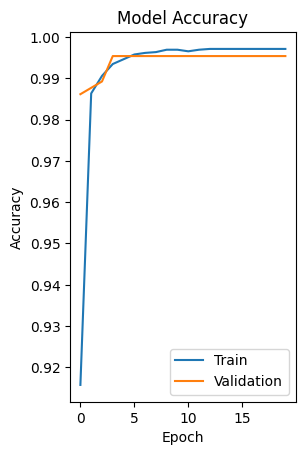

In [12]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right');

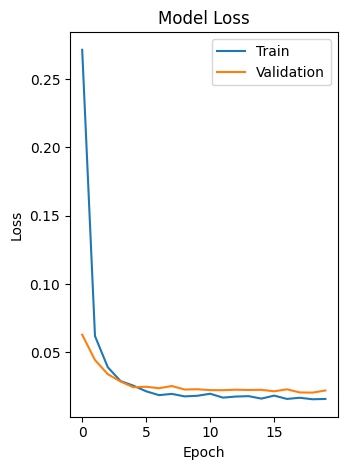

In [11]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()